In [12]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.9 MB 559.3 kB/s eta 0:00:05
   ---------- ----------------------------- 0.8/2.9 MB 609.8 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.9 MB 687.8 kB/s eta 0:00:03
   ------------------ --------------------- 1.3/2.9 MB 682.9 kB/s eta 0:00:03
   --------------------- ------------------ 1.6/2.9 MB 718.1 kB/s eta 0:00:02
   --------------------- ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.0 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/12.0 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.0 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.0 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.0 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.0 MB 1.1 MB/s eta 0:00:09
   ------- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24971 sha256=9d836366d1338d31e178efbeebbf9d466e74742555bc1714bcc04c3d10452f6d
  Stored in directory: c:\users\abhisek\appdata\local\pip\cache\wheels\44\af\da\5ffc433e2786f0b1a9c6f458d5fb8f611d8eb332387f18698f
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'rouge-score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge-score'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
# Cell A: ensure notebook can import from the repo root
import sys, os
from pathlib import Path

# point this to your project root where 'src/' lives.
# if notebook is opened from the repo root, this will be the current working directory:
repo_root = Path.cwd()  # <- usually D:\code1 in your setup
print("Notebook cwd:", repo_root)

# if your notebook lives in a subfolder, use parent() appropriately:
# repo_root = Path.cwd().parent

# add repo_root to sys.path if not already present
repo_root_str = str(repo_root.resolve())
if repo_root_str not in sys.path:
    sys.path.insert(0, repo_root_str)
    print("Inserted to sys.path:", repo_root_str)
else:
    print("Already in sys.path")

# quick check: list files at root
print("Root files:", os.listdir(repo_root))


Notebook cwd: d:\code1
Already in sys.path
Root files: ['config.yaml', 'experiments.ipynb', 'requirements.txt', 'results', 'src']


In [22]:
# Cell 2: setup + small dataset preview
import numpy as np
import os
import tensorflow as tf
from src.utils import load_config, prepare_dataset, make_tf_dataset, ensure_dir
from src.model import build_multimodal_model
from transformers import AutoTokenizer

# Load config
cfg = load_config("config.yaml")

# Prepare a small processed dataset (keep_small=True for fast debugging)
processed, tokenizer = prepare_dataset(cfg, split="train", keep_small=True)


print("Processed examples (small preview):", len(processed))
print("Tokenizer vocab size:", tokenizer.vocab_size)

# Inspect first example
ex = processed[0]
print("Image seq shape (seq_len, H, W, C):", ex['images'].shape)
print("Input_ids shape (seq_len, T):", ex['input_ids'].shape)

# Build a tf.data.Dataset for training using the processed small set
tfds = make_tf_dataset(processed, cfg, shuffle=True)
for batch in tfds.take(1):
    images_batch, input_ids_batch = batch
    print("Batch images shape:", images_batch.shape)   # (B, seq_len, H, W, C)
    print("Batch input_ids shape:", input_ids_batch.shape)  # (B, seq_len, T)


Processed examples (small preview): 256
Tokenizer vocab size: 30522
Image seq shape (seq_len, H, W, C): (3, 128, 128, 3)
Input_ids shape (seq_len, T): (3, 32)
Batch images shape: (16, 3, 128, 128, 3)
Batch input_ids shape: (16, 3, 32)
Batch images shape: (16, 3, 128, 128, 3)
Batch input_ids shape: (16, 3, 32)


In [17]:
# 3) Now import project modules
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import json
loss_history = []

# Import your src utilities and model
from src.utils import load_config, prepare_dataset, make_tf_dataset, ensure_dir
from src.model import build_multimodal_model

# 4) Load config and prepare a small dataset preview (fast)
cfg = load_config("config.yaml")
print("Loaded config. Seq len:", cfg['dataset']['seq_len'], "batch size:", cfg['dataset']['batch_size'])

# For notebook quick run, use keep_small=True (change to False for full runs)
processed, tokenizer = prepare_dataset(cfg, split="train", keep_small=True)
print("Processed examples (preview):", len(processed))
if len(processed) == 0:
    raise RuntimeError("No processed examples found. Check prepare_dataset.")

# Build a tf.data.Dataset from processed examples
tfds = make_tf_dataset(processed, cfg, shuffle=True)
for batch in tfds.take(1):
    images_batch, input_ids_batch = batch
    print("Sample batch shapes (images, input_ids):", images_batch.shape, input_ids_batch.shape)

# 5) Build model and visual encoder (same as train.py)
models_dict = build_multimodal_model(cfg)
model = models_dict['full_model']
visual_enc = models_dict['visual_enc']
print("Built model. Full model inputs:", model.inputs)

# 6) Training hyperparams
epochs = 5                   # set to 1 for quick notebook run; change as needed
lr = float(cfg['training']['lr'])
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
pad_token_id = int(cfg['model'].get('pad_token_id', 0))
bos_token_id = int(cfg['model'].get('bos_token_id', 101))
grad_clip = float(cfg['training'].get('grad_clip', 1.0))
save_dir = cfg['training'].get('save_dir', "results/checkpoints")
ensure_dir(save_dir)
ckpt_prefix = os.path.join(save_dir, "ckpt_notebook")

# 7) collate helper (same logic as train.py)
def collate_for_training_np(batch_images, batch_input_ids, bos_id=101):
    # batch_input_ids shape: (B, seq_len, T)
    target = batch_input_ids[:, -1, :]   # last caption in sequence (B, T)
    dec_input = np.concatenate([np.full((target.shape[0], 1), bos_id, dtype=np.int32), target[:, :-1]], axis=1)
    return batch_images, batch_input_ids, dec_input, target

# 8) A debug-friendly train_step (no @tf.function) with defensive dtype/shape handling
def train_step_impl(images_np, captions_seq_np, dec_input_np, dec_target_np):
    # convert -> tensors with correct dtype
    images = tf.convert_to_tensor(images_np, dtype=tf.float32)            # (B, S, H, W, C)
    captions_seq = tf.convert_to_tensor(captions_seq_np, dtype=tf.int32)  # (B, S, T)
    dec_input = tf.convert_to_tensor(dec_input_np, dtype=tf.int32)        # (B, T)
    dec_target = tf.convert_to_tensor(dec_target_np, dtype=tf.int32)      # (B, T)

    # Defensive: ensure rank 2 for dec_input / dec_target (some earlier flows gave (B,T,1))
    if tf.rank(dec_input) == 3 and tf.shape(dec_input)[-1] == 1:
        dec_input = tf.squeeze(dec_input, axis=-1)
    if tf.rank(dec_target) == 3 and tf.shape(dec_target)[-1] == 1:
        dec_target = tf.squeeze(dec_target, axis=-1)

    with tf.GradientTape() as tape:
        logits, img_pred = model([images, captions_seq, dec_input], training=True)
        # logits: (B, T, V), dec_target: (B, T)

        # TEXT LOSS: per-token sparse crossentropy, mask padding tokens
        per_token_loss = tf.keras.losses.sparse_categorical_crossentropy(dec_target, logits, from_logits=True)  # (B, T)
        mask = tf.cast(tf.not_equal(dec_target, pad_token_id), tf.float32)  # (B, T)
        per_token_loss = per_token_loss * mask
        loss_text = tf.reduce_sum(per_token_loss) / (tf.reduce_sum(mask) + 1e-8)

        # IMAGE LOSS: encode true last image and compare to img_pred
        last_images = images[:, -1, :, :, :]   # (B, H, W, C)
        target_img_feat = visual_enc(last_images, training=False)  # (B, D)
        # mean squared error: use explicit squared difference to avoid missing Keras alias
        loss_img = tf.reduce_mean(tf.square(target_img_feat - img_pred))

        loss = loss_text + 0.5 * loss_img

    grads = tape.gradient(loss, model.trainable_variables)
    grads, _ = tf.clip_by_global_norm(grads, grad_clip)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # return Python floats for easy printing in notebook
    return float(loss.numpy()), float(loss_text.numpy()), float(loss_img.numpy())

# 9) Training loop (quick small run)
step = 0
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    prog = tqdm(tfds, desc=f"Epoch {epoch+1}")
    for batch in prog:
        images_batch, input_ids_batch = batch
        images_np = images_batch.numpy()
        input_ids_np = input_ids_batch.numpy()
        imgs_np, caps_seq_np, dec_in_np, dec_tgt_np = collate_for_training_np(images_np, input_ids_np, bos_id=bos_token_id)
        loss, loss_text, loss_img = train_step_impl(imgs_np, caps_seq_np, dec_in_np, dec_tgt_np)
        loss_history.append({"step": step, "epoch": epoch+1, "loss": loss, "loss_text": loss_text, "loss_img": loss_img})
        if step % max(1, int(cfg['training'].get('log_interval', 50))) == 0:
            prog.set_description(f"step {step} loss={loss:.4f} text={loss_text:.4f} img={loss_img:.4f}")
        step += 1

    # save checkpoint at epoch end (use Keras-compatible filename)
    model.save_weights(f"{ckpt_prefix}_epoch{epoch+1}.weights.h5")
    print("Saved checkpoint:", f"{ckpt_prefix}_epoch{epoch+1}.weights.h5")

print("Done training (notebook quick run).")

# Save loss history to a JSON file
with open("results/loss_history.json", "w") as f:
    json.dump(loss_history, f)
print("Saved loss_history.json (results/loss_history.json).")


Loaded config. Seq len: 3 batch size: 16
Processed examples (preview): 256
Processed examples (preview): 256
Sample batch shapes (images, input_ids): (16, 3, 128, 128, 3) (16, 3, 32)
Sample batch shapes (images, input_ids): (16, 3, 128, 128, 3) (16, 3, 32)
Built model. Full model inputs: [<KerasTensor shape=(None, 3, 128, 128, 3), dtype=float32, sparse=False, ragged=False, name=images_seq>, <KerasTensor shape=(None, 3, 32), dtype=int32, sparse=False, ragged=False, name=captions_seq>, <KerasTensor shape=(None, 32), dtype=int32, sparse=False, ragged=False, name=dec_input>]
Epoch 1/5
Built model. Full model inputs: [<KerasTensor shape=(None, 3, 128, 128, 3), dtype=float32, sparse=False, ragged=False, name=images_seq>, <KerasTensor shape=(None, 3, 32), dtype=int32, sparse=False, ragged=False, name=captions_seq>, <KerasTensor shape=(None, 32), dtype=int32, sparse=False, ragged=False, name=dec_input>]
Epoch 1/5


step 0 loss=0.6508 text=0.0000 img=1.3015: : 16it [03:42, 13.89s/it]



Saved checkpoint: results/checkpoints\ckpt_notebook_epoch1.weights.h5
Epoch 2/5


Epoch 2: 16it [03:35, 13.49s/it]



Saved checkpoint: results/checkpoints\ckpt_notebook_epoch2.weights.h5
Epoch 3/5


Epoch 3: 16it [03:29, 13.10s/it]



Saved checkpoint: results/checkpoints\ckpt_notebook_epoch3.weights.h5
Epoch 4/5


step 50 loss=0.0001 text=0.0000 img=0.0002: : 16it [03:26, 12.89s/it]



Saved checkpoint: results/checkpoints\ckpt_notebook_epoch4.weights.h5
Epoch 5/5


Epoch 5: 16it [03:24, 12.78s/it]



Saved checkpoint: results/checkpoints\ckpt_notebook_epoch5.weights.h5
Done training (notebook quick run).
Saved loss_history.json (results/loss_history.json).


In [18]:
# Cell 4: load weights and run greedy decoding on a single example
import numpy as np

# Rebuild model structures (same as during training)
models_dict_inf = build_multimodal_model(cfg)
full_model_inf = models_dict_inf['full_model']
text_decoder = models_dict_inf['text_decoder']  # this is built to accept [images_seq, captions_seq, dec_input]
visual_enc_inf = models_dict_inf['visual_enc']

# load weights we saved earlier
ckpt_path = f"{ckpt_prefix}_epoch{epochs}.weights.h5"
full_model_inf.load_weights(ckpt_path)  # loads weights into the model
print("Loaded weights from:", ckpt_path)

# pick an example from processed set
example = processed[0]
images = example['images']  # (seq_len, H, W, C)
captions_seq = example['input_ids']  # (seq_len, T)

# batchify (B=1)
images_b = np.expand_dims(images, axis=0).astype(np.float32)
captions_seq_b = np.expand_dims(captions_seq, axis=0).astype(np.int32)

# Greedy autoregressive decoding using text_decoder:
max_dec_len = cfg['dataset']['max_caption_len']
bos_id = cfg['model'].get('bos_token_id', 101)
pad_id = cfg['model'].get('pad_token_id', 0)

# start with BOS
generated = [bos_id]

for t in range(max_dec_len):
    # Build a dec_input array of length max_dec_len where the prefix is 'generated' and rest zeros
    dec_input = np.zeros((1, max_dec_len), dtype=np.int32)
    dec_input[0, :len(generated)] = np.array(generated, dtype=np.int32)
    # call text_decoder: it expects [images_seq, captions_seq, dec_input]
    logits = text_decoder([images_b, captions_seq_b, dec_input], training=False)  # shape (1, T, V)
    # take logits at timestep t (index t)
    logits_t = logits.numpy()[0, t, :]  # (V,)
    next_token = int(np.argmax(logits_t))
    generated.append(next_token)
    # stop if EOS token predicted (if tokenizer has one)
    if next_token == cfg['model'].get('eos_token_id', 102):
        break

# Generated token ids (excluding initial BOS)
gen_ids = generated[1:]
print("Generated token ids:", gen_ids)

# Decode to text using tokenizer
# tokenizer.decode expects a list of ids; remove padding and special tokens if desired
# Convert tokens to string:
generated_text = tokenizer.decode([tid for tid in gen_ids if tid != pad_id], skip_special_tokens=True)
print("Generated text:", generated_text)

# Show ground-truth last caption (target)
target_ids = captions_seq[-1]  # last caption tokens (np array)
gt_text = tokenizer.decode([int(x) for x in target_ids if int(x) != pad_id], skip_special_tokens=True)
print("Ground truth last caption:", gt_text)

Loaded weights from: results/checkpoints\ckpt_notebook_epoch5.weights.h5
Generated token ids: [2102, 19160, 20088, 7498, 23348, 6625, 1877, 14502, 28322, 15555, 29988, 7784, 10522, 3867, 10668, 2379, 2379, 27413, 14147, 27413, 14147, 14147, 27601, 25623, 5353, 13262, 21088, 16432, 16432, 23722, 16934, 9009]
Generated text: ##t modular histoire prefecture scoop comfortable 李 podium hypnotic deborahს significance edmonton percent sip near nearnatoryingnatoryingying correspondedsboro weekend tiles turrets textbook textbooksul stacked discipline
Ground truth last caption: 
Generated token ids: [2102, 19160, 20088, 7498, 23348, 6625, 1877, 14502, 28322, 15555, 29988, 7784, 10522, 3867, 10668, 2379, 2379, 27413, 14147, 27413, 14147, 14147, 27601, 25623, 5353, 13262, 21088, 16432, 16432, 23722, 16934, 9009]
Generated text: ##t modular histoire prefecture scoop comfortable 李 podium hypnotic deborahს significance edmonton percent sip near nearnatoryingnatoryingying correspondedsboro weekend til

In [7]:
# Cell: Evaluation & Visualization
import os, json, math, random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

# metrics
import nltk
from rouge_score import rouge_scorer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhisek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
# config & model (reuse cfg and tokenizer from previous cells)
# ensure cfg, tokenizer, build_multimodal_model are in the namespace (from earlier)
# choose which checkpoint to load
epoch_to_load = 5
ckpt_path = f"{ckpt_prefix}_epoch{epoch_to_load}.weights.h5"
print("Loading checkpoint:", ckpt_path)

# rebuild model and load weights
models_inf = build_multimodal_model(cfg)
full_model_inf = models_inf['full_model']
text_decoder = models_inf['text_decoder']
full_model_inf.load_weights(ckpt_path)
print("Loaded model weights.")

# Choose dataset split to evaluate on (use "train","validation" or "test" if available)
split = "train"
processed_eval, tokenizer_eval = prepare_dataset(cfg, split=split, keep_small=False)

Loading checkpoint: results/checkpoints\ckpt_notebook_epoch5.weights.h5
Loaded model weights.
Loaded model weights.


In [20]:
# If dataset too large, use a subset (e.g., 20% or top N examples)
max_examples = int(len(processed_eval) * 0.2)  # 20%
max_examples = min(max_examples, 10)  # cap at 200 for quick evaluation
if max_examples <= 0:
    raise RuntimeError("No examples in processed_eval. Check prepare_dataset.")

print(f"Evaluating on {max_examples} / {len(processed_eval)} examples (split={split}).")

Evaluating on 10 / 3552 examples (split=train).


Evaluating: 100%|██████████| 10/10 [07:19<00:00, 44.00s/it]



Avg BLEU (sentence-level): 0.0000
Avg ROUGE-L (F1):         0.0000

Examples (ground-truth vs prediction):

Example 1: BLEU=0.0000 ROUGE-L=0.0000
GT : 
PR : ##t modular histoire prefecture scoop comfortable 李 podium hypnotic eden cart cart hopped ammonia contraisch harry proponents probationisch 戦 displayمgues epoch® corrugated efficiency reg aqueductbcans

Example 2: BLEU=0.0000 ROUGE-L=0.0000
GT : 
PR : ##t modular histoire prefecture scoop comfortable 李 podium hypnotic deborahს significance edmonton percent sip near nearnatoryingnatoryingying correspondedsboro weekend tiles turrets textbook textbooksul stacked discipline

Example 3: BLEU=0.0000 ROUGE-L=0.0000
GT : 
PR : ##t modular histoire prefecture scoop comfortable 李 podium hypnotic deborahს significance edmonton percent sip near nearnatoryingnatoryingying correspondedsboro weekend tiles turrets textbook textbooksul stacked discipline

Example 4: BLEU=0.0000 ROUGE-L=0.0000
GT : 
PR : ##t modular histoire prefecture scoop comfort

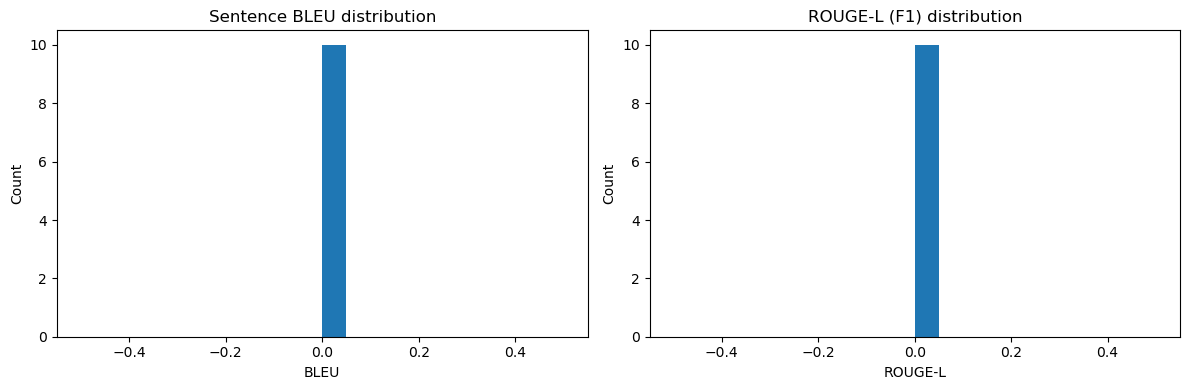

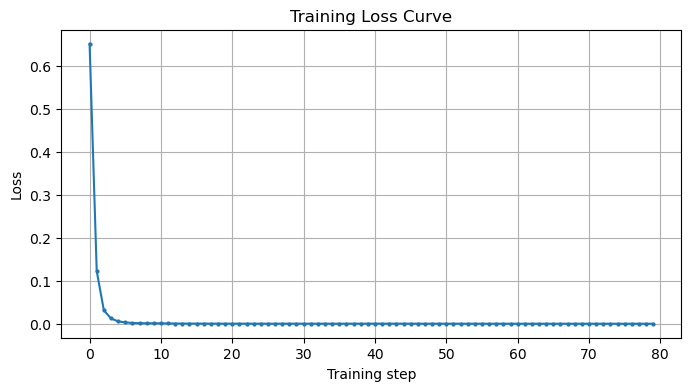

In [21]:
# helper: greedy decode for one example (batch size 1)
def greedy_decode_example(images_seq_np, captions_seq_np, max_dec_len=None):
    if max_dec_len is None:
        max_dec_len = cfg['dataset']['max_caption_len']
    images_b = np.expand_dims(images_seq_np, axis=0).astype(np.float32)
    captions_b = np.expand_dims(captions_seq_np, axis=0).astype(np.int32)
    bos_id = int(cfg['model'].get('bos_token_id', 101))
    pad_id = int(cfg['model'].get('pad_token_id', 0))
    generated = [bos_id]
    for t in range(max_dec_len):
        dec_input = np.zeros((1, max_dec_len), dtype=np.int32)
        dec_input[0, :len(generated)] = np.array(generated, dtype=np.int32)
        logits = text_decoder([images_b, captions_b, dec_input], training=False)
        logits_t = logits.numpy()[0, t, :]
        next_token = int(np.argmax(logits_t))
        generated.append(next_token)
        if next_token == int(cfg['model'].get('eos_token_id', 102)):
            break
    # remove BOS, EOS, pads for decoding
    gen_ids = [int(x) for x in generated[1:] if int(x) != pad_id and int(x) != cfg['model'].get('eos_token_id', 102)]
    gen_text = tokenizer_eval.decode(gen_ids, skip_special_tokens=True)
    return gen_text, gen_ids

# Setup scorers
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

bleu_scores = []
rougeL_scores = []
examples = []

num_to_eval = max_examples
indices = list(range(len(processed_eval)))
random.shuffle(indices)
indices = indices[:num_to_eval]

for idx in tqdm(indices, desc="Evaluating"):
    ex = processed_eval[idx]
    images_seq = ex['images']          # (seq_len, H, W, C)
    captions_seq = ex['input_ids']     # (seq_len, T)

    # decode
    pred_text, pred_ids = greedy_decode_example(images_seq, captions_seq)

    # ground-truth target = last caption
    gt_ids = [int(x) for x in captions_seq[-1] if int(x) != int(cfg['model'].get('pad_token_id', 0))]
    gt_text = tokenizer_eval.decode(gt_ids, skip_special_tokens=True)

    # compute BLEU (sentence-level) using NLTK (simple)
    try:
        ref_tokens = nltk.word_tokenize(gt_text.lower())
        hyp_tokens = nltk.word_tokenize(pred_text.lower())
        # use BLEU-4 with smoothing; avoid zero-length
        if len(hyp_tokens) == 0:
            bleu = 0.0
        else:
            bleu = nltk.translate.bleu_score.sentence_bleu([ref_tokens], hyp_tokens, 
                                                           smoothing_function=nltk.translate.bleu_score.SmoothingFunction().method1)
    except Exception:
        bleu = 0.0

    # ROUGE-L
    r = scorer.score(gt_text, pred_text)['rougeL'].fmeasure

    bleu_scores.append(bleu)
    rougeL_scores.append(r)

    # store a few examples to display later
    if len(examples) < 10:
        examples.append({
            "gt": gt_text,
            "pred": pred_text,
            "bleu": bleu,
            "rougeL": r
        })

# Report corpus averages
import statistics
avg_bleu = statistics.mean(bleu_scores) if len(bleu_scores) else 0.0
avg_rouge = statistics.mean(rougeL_scores) if len(rougeL_scores) else 0.0
print(f"Avg BLEU (sentence-level): {avg_bleu:.4f}")
print(f"Avg ROUGE-L (F1):         {avg_rouge:.4f}")

# Print some example predictions
print("\nExamples (ground-truth vs prediction):")
for i, e in enumerate(examples):
    print(f"\nExample {i+1}: BLEU={e['bleu']:.4f} ROUGE-L={e['rougeL']:.4f}")
    print("GT :", e['gt'])
    print("PR :", e['pred'])

# Plot histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(bleu_scores, bins=20)
plt.title("Sentence BLEU distribution")
plt.xlabel("BLEU")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(rougeL_scores, bins=20)
plt.title("ROUGE-L (F1) distribution")
plt.xlabel("ROUGE-L")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot loss curve if exists
loss_file = "results/loss_history.json"
if os.path.exists(loss_file):
    with open(loss_file, "r") as f:
        loss_history = json.load(f)
    steps = [d["step"] for d in loss_history]
    losses = [d["loss"] for d in loss_history]
    plt.figure(figsize=(8,4))
    plt.plot(steps, losses, '-o', markersize=2)
    plt.xlabel("Training step")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.grid(True)
    plt.show()
else:
    print("No loss_history.json found (skipping loss plot).")